In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# read dataset
df_train = pd.read_csv("titanic_training.csv")#("titanic_training.csv")
df_test = pd.read_csv("titanic_testing.csv")

In [3]:
def preprocess(df):
    df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})
    df['Name'] = df['Name'].str.len()
    return df

In [4]:
df_train = preprocess(df_train)
df_test = preprocess(df_test)

In [5]:
X = df_train.iloc[:, 0:7].values # attributes/inputs
y = df_train['Survived'].values # output / needs to be predict
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_test = df_test.iloc[:, 0:7].values # attributes/inputs
y_test = df_test['Survived'].values # output / needs to be predict

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4,ccp_alpha=0.001)
clf = clf.fit(X_train, y_train)

In [8]:
clf_2 = DecisionTreeClassifier(max_depth=7)#,ccp_alpha=0.01)

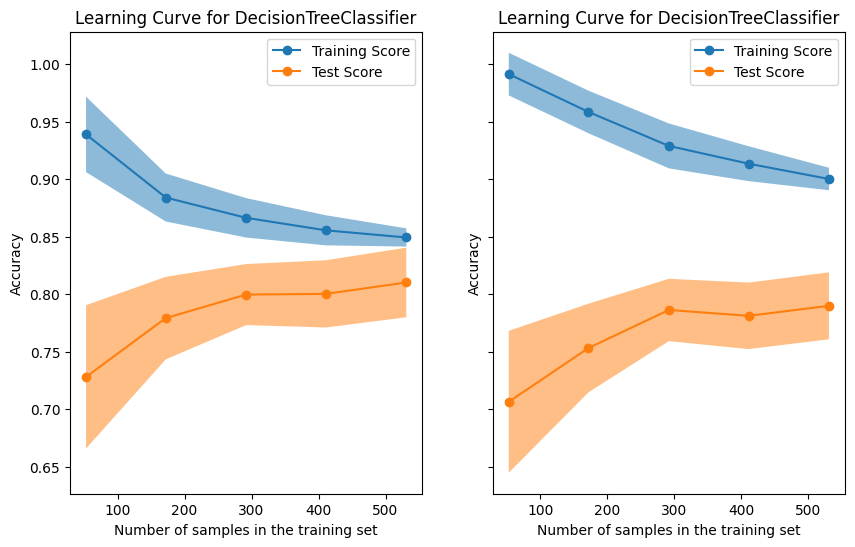

In [9]:
#plot
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=42),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([clf, clf_2]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [10]:
#ccp_alpha

In [12]:
clf_7 = DecisionTreeClassifier(max_depth=10)
clf_7 = clf_7.fit(X, y)

In [13]:
predictions = clf_7.predict(X_test)
# predictions

In [14]:
# # show difference between tree that doesn't have stopping criteria and the one that does
# clf.predict_proba(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7623318385650224

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[120,  13],
       [ 43,  47]], dtype=int64)

In [62]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.7833333333333333

In [63]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.5222222222222223

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       133
           1       0.78      0.52      0.63        90

    accuracy                           0.75       223
   macro avg       0.76      0.71      0.72       223
weighted avg       0.76      0.75      0.74       223



In [69]:
feature_names = list(df_train.iloc[:, 0:7].columns.values)
feature_names

['Pclass',
 'Name',
 'Sex',
 'Age',
 'Siblings/Spouses Aboard',
 'Parents/Children Aboard',
 'Fare']

In [70]:
clf.feature_importances_

array([0., 0., 1., 0., 0., 0., 0.])

In [71]:
feature_importance = pd.Series(clf.feature_importances_, index = feature_names).sort_values(ascending=False)
feature_importance

Sex                        1.0
Pclass                     0.0
Name                       0.0
Age                        0.0
Siblings/Spouses Aboard    0.0
Parents/Children Aboard    0.0
Fare                       0.0
dtype: float64

In [72]:
# features = list(feature_importance[feature_importance[0]>0].index)
# features

<Axes: >

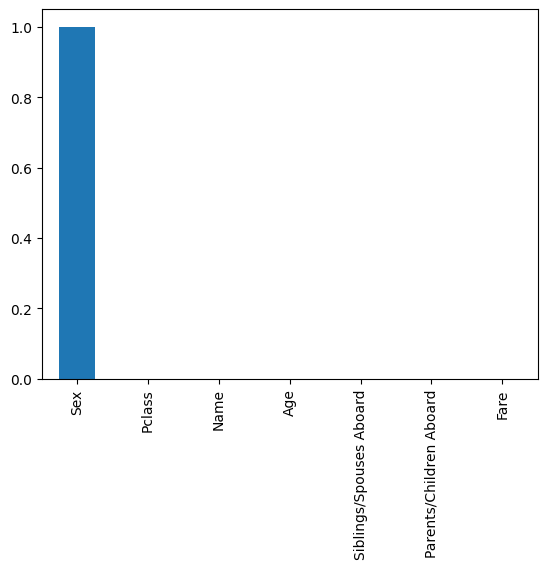

In [73]:
feature_importance.head(10).plot(kind='bar')

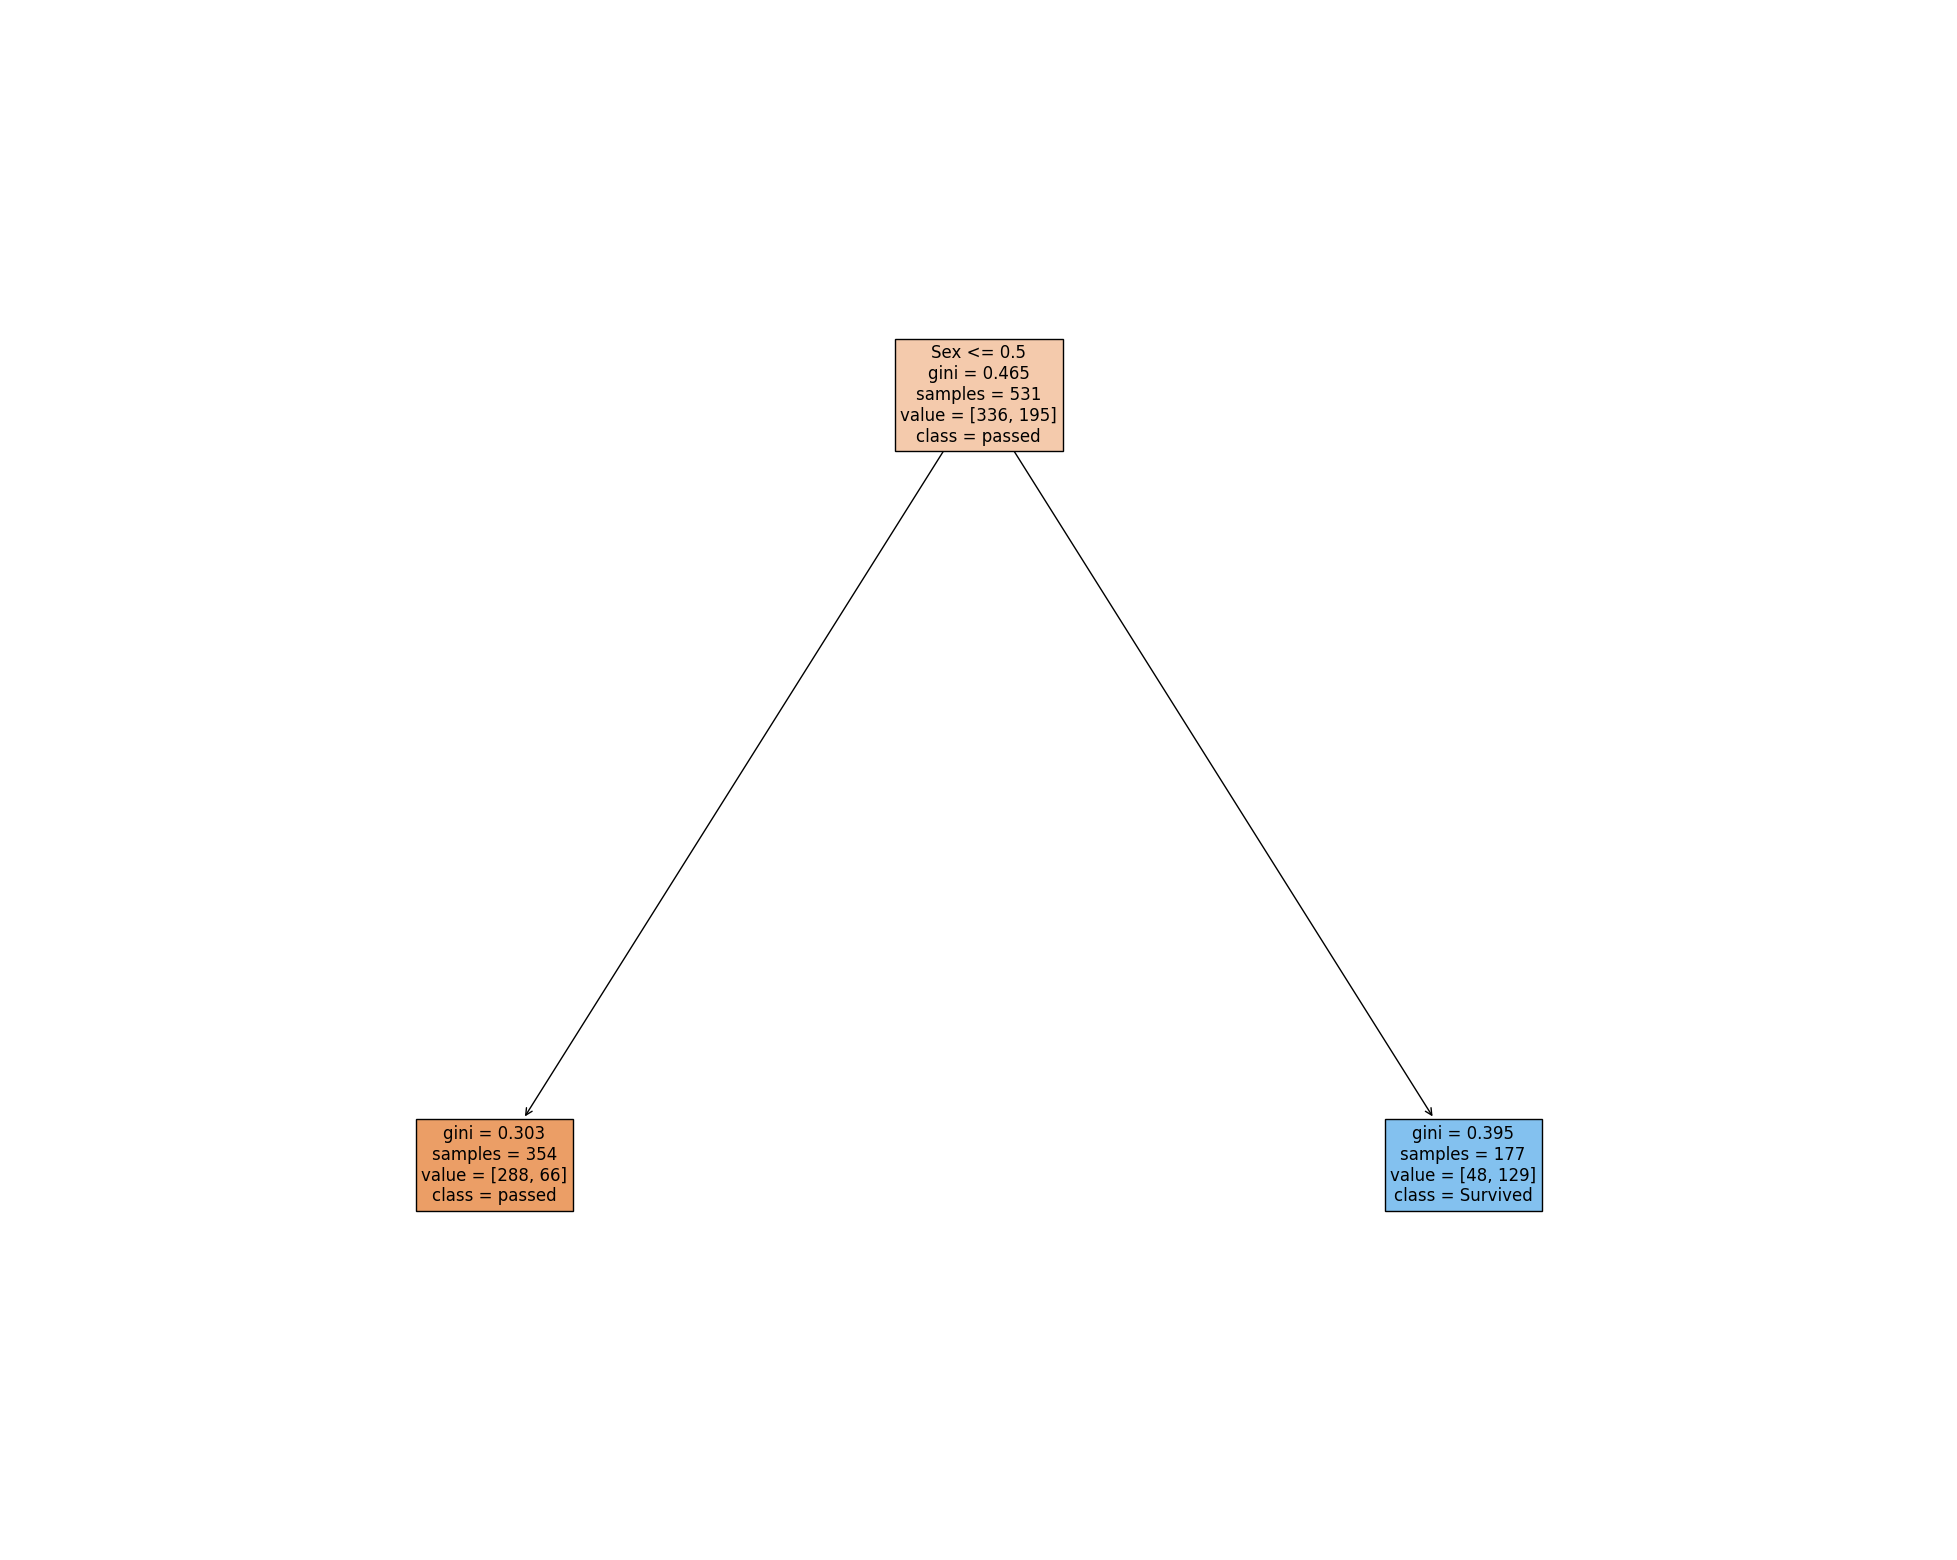

In [74]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names=['passed','Survived'],
                   filled=True,
                  fontsize=12)

In [30]:
# follow the first example on the tree to explain the decision_path function output
#X_test.head()

In [31]:
#clf.decision_path(X_test)

In [32]:
#sparse = clf.decision_path(X_test).toarray()[:101]

In [33]:
#plt.figure(figsize=(20, 20))
#plt.spy(sparse, markersize=5)